In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
#All from other notebook
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

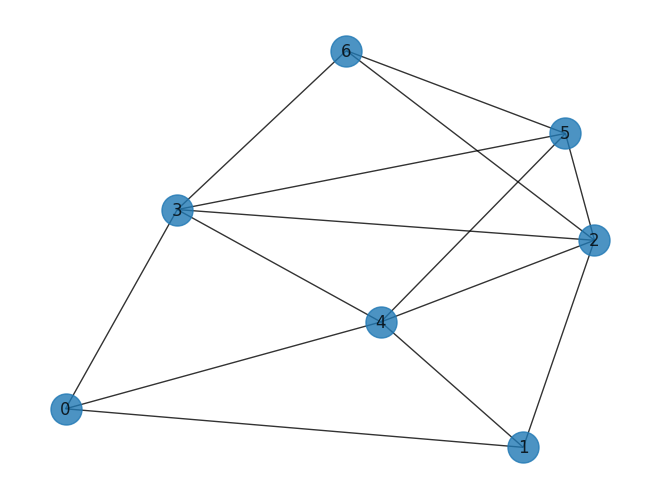

In [39]:
import networkx as nx
shotnum = 2000000
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([(0, 3), (0,1), (0,4), (1,4), (1,2), (4,2), (4,3), (4,5), (3,2),(3,6),(3,5),(2,5),(2,6),(6,5)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

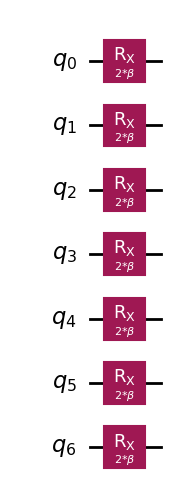

In [40]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = len(G.nodes)

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw('mpl')

(0, 3)
(0, 1)
(0, 4)
(1, 4)
(1, 2)
(2, 4)
(2, 3)
(2, 5)
(2, 6)
(3, 4)
(3, 6)
(3, 5)
(4, 5)
(5, 6)


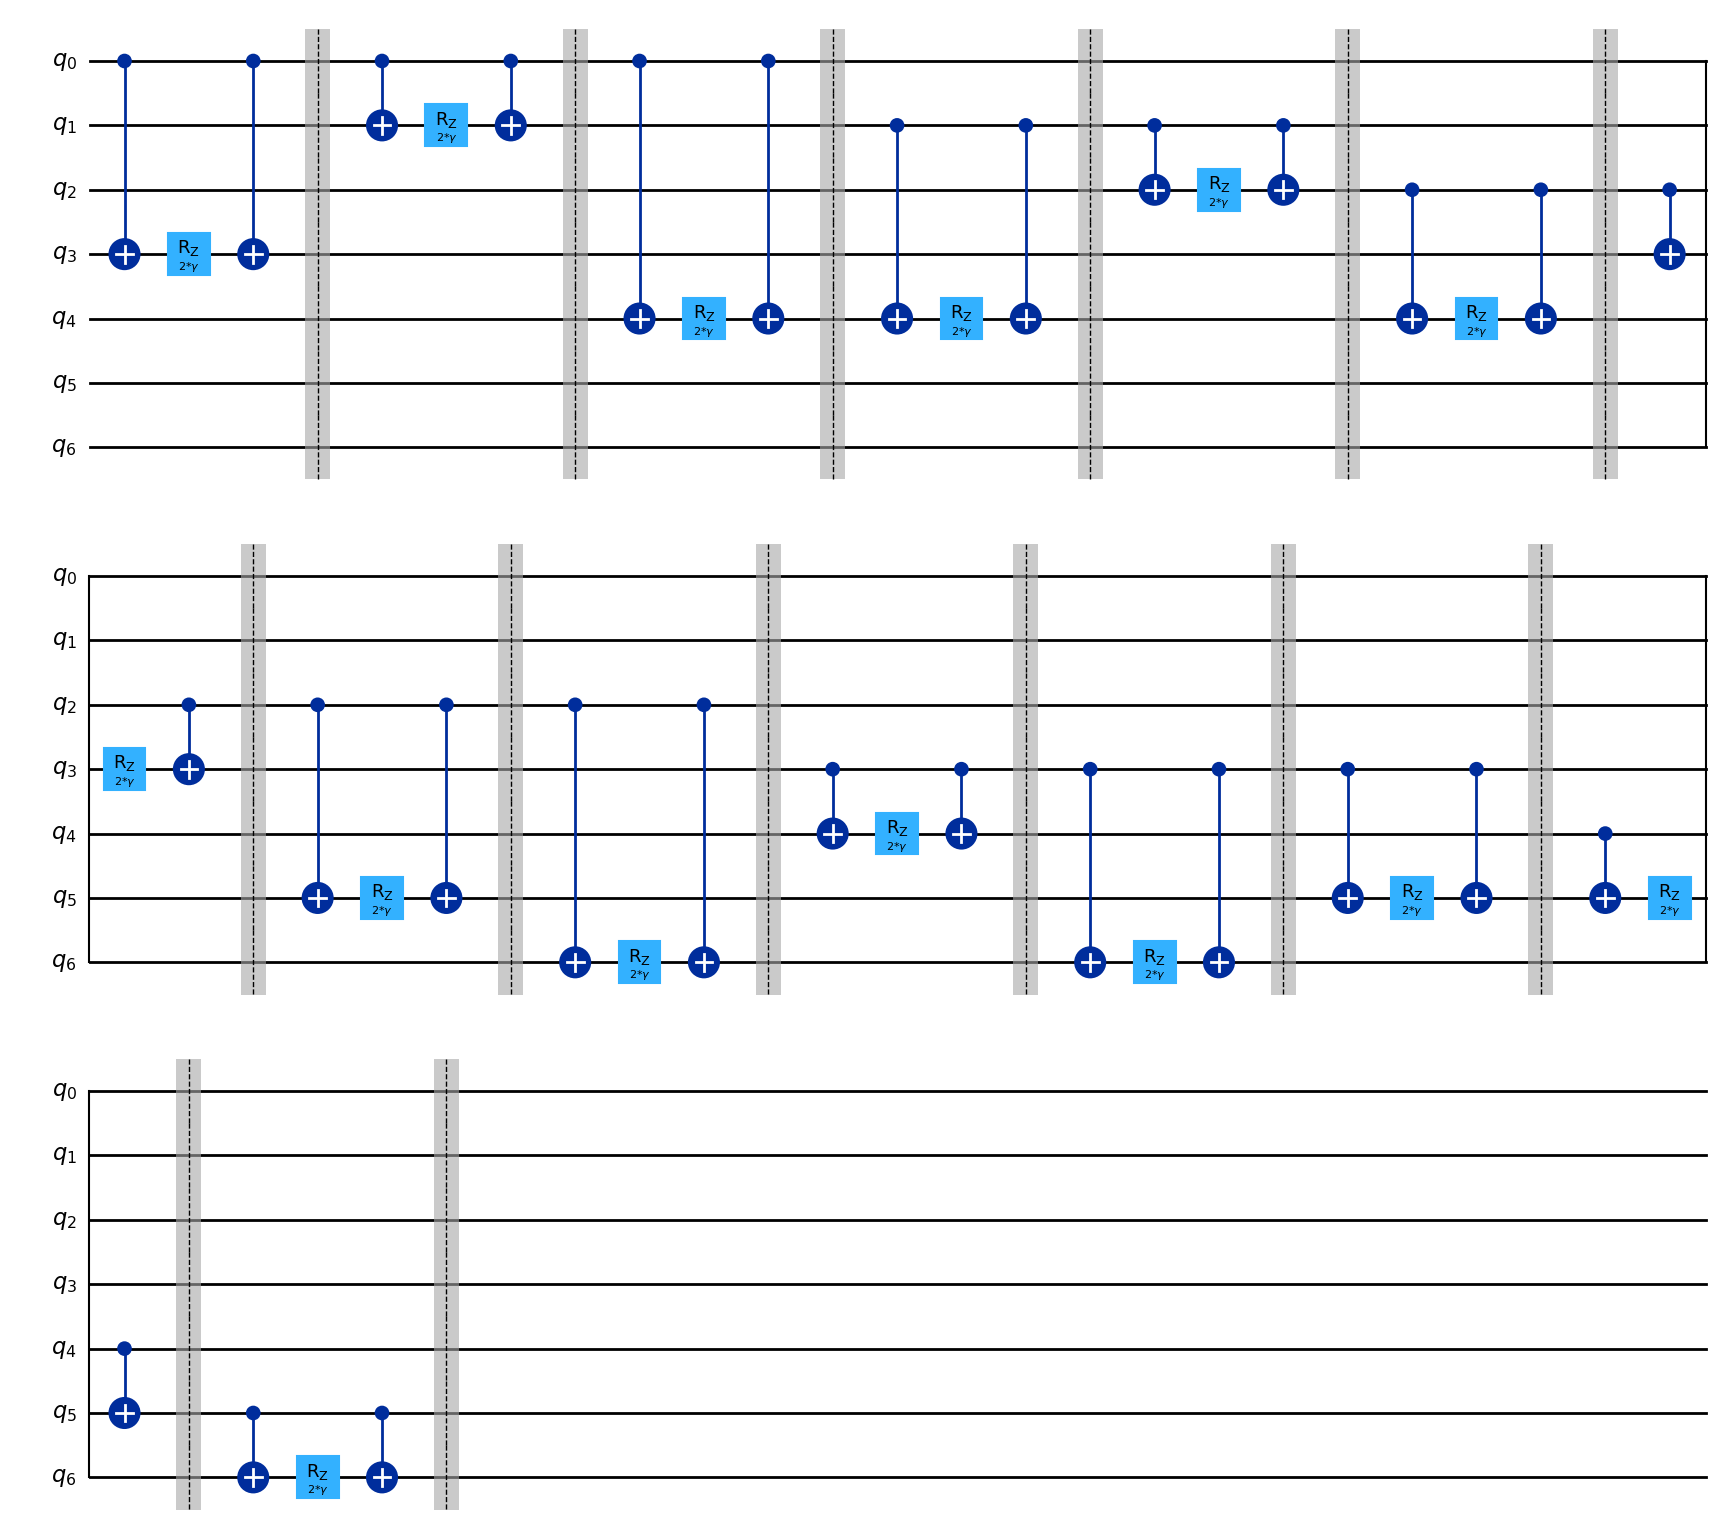

In [41]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    print(pair)
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
qc_p.decompose().draw('mpl')


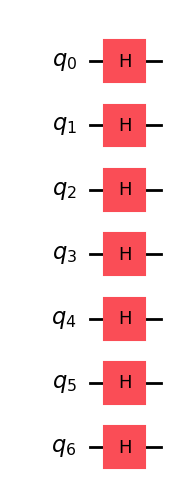

In [42]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw('mpl')

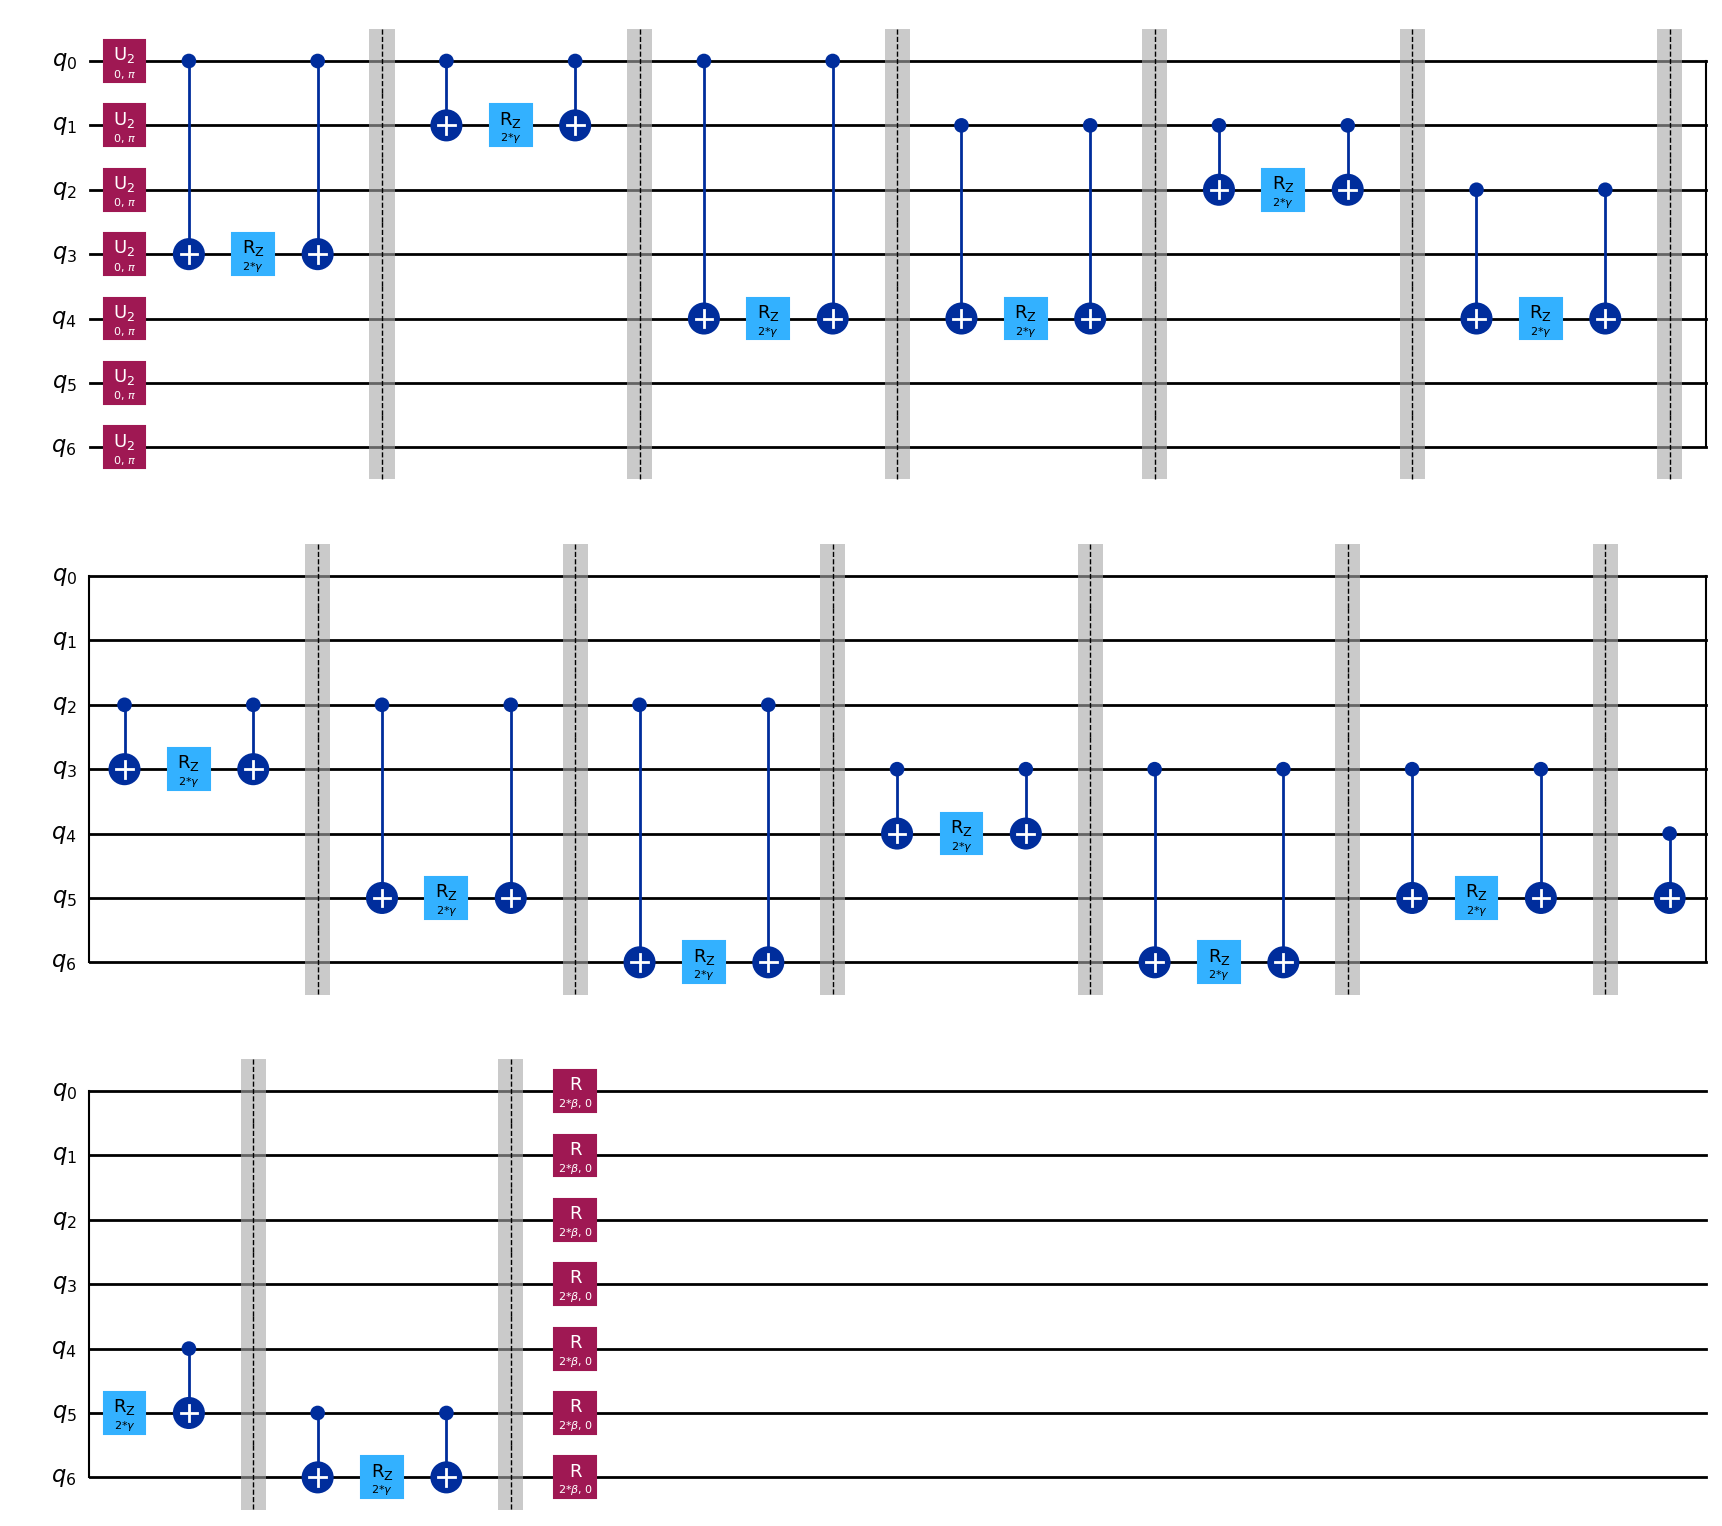

In [43]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw('mpl')

In [44]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring[::-1], G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

Bet = []
Gam = []
# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    #print('theta: ', theta)
    #print('p: ', p)
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    #extra start
    print('beta: ', beta)
    print('gamma: ', gamma)
    Bet.append(beta)
    Gam.append(gamma)
    ##extra done
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

def execute_circ(theta):
        
        qc = create_qaoa_circ(G, theta)
        counts = AerSimulator().run(qc, seed_simulator=10, 
                             shots=shotnum).result().get_counts()
        
        return compute_expectation(counts, G)

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, shots=shotnum):
    
    """
    Runs parametrized circuit
    """
    
#    backend = Aer.get_backend('aer_simulator')
    AerSimulator.shots = shotnum
    
   
    
    return execute_circ

beta:  [1.]
gamma:  [1.]
beta:  [2.]
gamma:  [1.]
beta:  [1.]
gamma:  [2.]
beta:  [0.56373118]
gamma:  [0.10018362]
beta:  [0.78186559]
gamma:  [0.55009181]
beta:  [1.24612567]
gamma:  [0.95615761]
beta:  [1.03586069]
gamma:  [1.24741465]
beta:  [1.07033375]
gamma:  [1.49502646]
beta:  [1.05309722]
gamma:  [1.37122056]
beta:  [1.02022218]
gamma:  [1.49182003]
beta:  [1.17806968]
gamma:  [1.36859682]
beta:  [1.29344976]
gamma:  [1.41668463]
beta:  [1.19301514]
gamma:  [1.30791006]
beta:  [1.16776854]
gamma:  [1.28949345]
beta:  [1.2242369]
gamma:  [1.30658181]
beta:  [1.23224727]
gamma:  [1.33678772]
beta:  [1.24781738]
gamma:  [1.33809625]
beta:  [1.21889838]
gamma:  [1.34490855]
beta:  [1.22966536]
gamma:  [1.32941419]
beta:  [1.22965338]
gamma:  [1.3216017]
beta:  [1.22185994]
gamma:  [1.32974682]
beta:  [1.22120556]
gamma:  [1.33359787]
beta:  [1.22142527]
gamma:  [1.32586483]
beta:  [1.22381244]
gamma:  [1.32969727]
beta:  [1.22430696]
gamma:  [1.33053936]
beta:  [1.22413793]
gamma

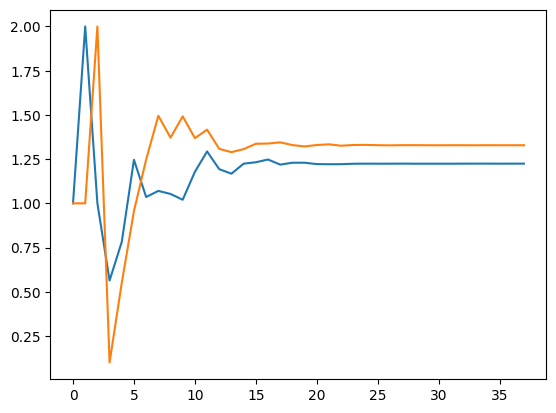

In [45]:
from scipy.optimize import minimize


expectation = get_expectation(G)

res = minimize(expectation, 
                      [1.0, 1.0], 
                      method='COBYLA')                  
res 

Tim = range(len(Bet))
plt.plot(Tim, Bet)
plt.plot(Tim, Gam)
plt.show()

beta:  [1.22447301]
gamma:  [1.32853757]
{'1111000': 22122, '1110000': 23891, '1001110': 19622, '1010101': 58740, '0011010': 34415, '0101010': 58773, '0110110': 10341, '1111011': 538, '1000111': 33209, '0111000': 33143, '1011000': 19474, '0010100': 10107, '0011100': 32040, '1100110': 12309, '1011100': 16885, '0101011': 19464, '0110101': 30525, '1111100': 286, '1000110': 10350, '1010010': 33817, '0001010': 22678, '1110010': 45074, '0111111': 3515, '0100001': 6737, '0110011': 3228, '0101101': 34081, '0000100': 534, '1110101': 22456, '0100110': 19918, '0111010': 30941, '0001111': 24211, '0101001': 19605, '1100010': 17233, '0001101': 45141, '0100100': 5605, '0111100': 24824, '1110111': 534, '1001011': 33122, '1011001': 19804, '0010101': 34338, '1011010': 58554, '1011110': 6722, '0110010': 19811, '0101110': 34082, '1111111': 1328, '1000011': 25221, '0000101': 22235, '0001011': 22253, '1001101': 19712, '1110001': 44921, '1100011': 31621, '0111011': 665, '0100101': 58514, '0001110': 44923, '1

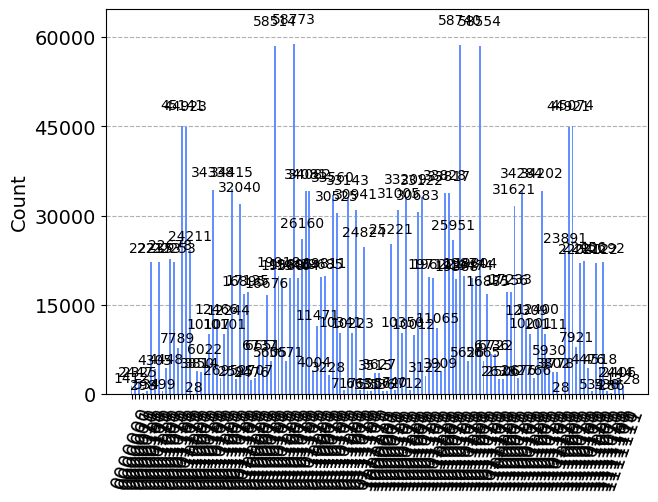

In [49]:
from qiskit.visualization import plot_histogram


qc_res = create_qaoa_circ(G, res.x)

counts = AerSimulator().run(qc_res, seed_simulator=10, shots=shotnum).result().get_counts()
print(counts)
plot_histogram(counts)
